# **1. 导入库** <a class="anchor" id="7"></a>

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/car-evaluation-data-set/car_evaluation.csv


In [2]:
import warnings

warnings.filterwarnings('ignore')

# **2. 加载数据集** <a class="anchor" id="8"></a>

In [3]:
data = '/kaggle/input/car-evaluation-data-set/car_evaluation.csv'
df = pd.read_csv(data, header=None)

# **3. 探索性数据分析** <a class="anchor" id="9"></a>

In [4]:
df.shape

(1728, 7)

### 查看数据集的前5行

In [5]:
df.head()

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


### 重命名列名

我们可以看到数据集没有正确的列名。列仅仅标记为0、1、2....等等......。我们应该给这些列起适当的名字。

In [6]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

df.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [7]:
df.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


我们可以看到列名被重命名了。现在，列有了有意义的名称。

### 查看数据集摘要

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
buying      1728 non-null object
maint       1728 non-null object
doors       1728 non-null object
persons     1728 non-null object
lug_boot    1728 non-null object
safety      1728 non-null object
class       1728 non-null object
dtypes: object(7)
memory usage: 94.6+ KB


### 变量中值的频率分布

现在，我将检查分类变量的频率计数。

In [9]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

for col in col_names:
    print(df[col].value_counts())   


med      432
high     432
low      432
vhigh    432
Name: buying, dtype: int64
med      432
high     432
low      432
vhigh    432
Name: maint, dtype: int64
4        432
3        432
2        432
5more    432
Name: doors, dtype: int64
4       576
more    576
2       576
Name: persons, dtype: int64
big      576
med      576
small    576
Name: lug_boot, dtype: int64
med     576
high    576
low     576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


### 变量总结

—数据集中有7个变量。所有变量都是分类数据类型。
—`buying`, `maint`, `doors`, `persons`, `lug_boot`, `safety`, `class`
—“class”是目标变量。

### 探索“class”变量

In [10]:
df['class'].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

### 变量中的缺失值

In [11]:
df.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

我们可以看到数据集中没有缺失值。我之前检查过值的频率分布。它还确认数据集中没有缺失值。

# **4. 声明特征向量和目标变量** <a class="anchor" id="10"></a>

In [12]:
X = df.drop(['class'], axis=1)
y = df['class']

# **5. 将数据分成单独的训练集和测试集** <a class="anchor" id="11"></a>

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [14]:
X_train.shape, X_test.shape

((1157, 6), (571, 6))

# **6. 特征工程** <a class="anchor" id="12"></a>

**特征工程** 是将原始数据转换为有用特征的过程，这些特征可以帮助我们更好地理解模型并提高其预测能力。我将对不同类型的变量进行特征工程。

因此，我将再次检查变量的数据类型。

In [15]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

### 编码分类变量
现在，我将对分类变量进行编码。

In [16]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,vhigh,vhigh,3,more,med,low
468,high,vhigh,3,4,small,low
155,vhigh,high,3,more,small,high
1721,low,low,5more,more,small,high
1208,med,low,2,more,small,high


In [17]:
import category_encoders as ce

In [18]:
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)

X_test = encoder.transform(X_test)

In [19]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
48,1,1,1,1,1,1
468,2,1,1,2,2,1
155,1,2,1,1,2,2
1721,3,3,2,1,2,2
1208,4,3,3,1,2,2


In [20]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,2,2,4,3,1,2
1201,4,3,3,2,1,3
628,2,2,2,3,3,3
1498,3,2,2,2,1,3
1263,4,3,4,1,1,1


现在，我们已经为模型构建准备好了训练和测试集。

# **7. 随机森林分类器模型与默认参数** <a class="anchor" id="13"></a>

In [21]:
# 导入随机森林分类器
from sklearn.ensemble import RandomForestClassifier

# 实例化分类器
rfc = RandomForestClassifier(random_state=0)

# 拟合模型
rfc.fit(X_train, y_train)

# 预测测试集结果
y_pred = rfc.predict(X_test)

# 检查准确度得分
from sklearn.metrics import accuracy_score

print('Model accuracy score with 10 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with 10 decision-trees : 0.9247


在这里，**y_test** 是测试集中的真实类标签，而 **y_pred** 是测试集中预测的类标签。

在这里，我使用默认参数 `n_estimators = 10` 构建了随机森林分类器模型。因此，我使用了10棵决策树来构建模型。现在，我将增加决策树的数量，看看它对准确度的影响。

# **8. 参数n_estimators=100的随机森林分类器模型** <a class="anchor" id="14"></a>

In [22]:
# 使用 n_estimators = 100 实例化分类器
rfc_100 = RandomForestClassifier(n_estimators=100, random_state=0)

# 将模型拟合到训练集
rfc_100.fit(X_train, y_train)

# 对测试集结果进行预测
y_pred_100 = rfc_100.predict(X_test)

# 检查准确度得分
print('Model accuracy score with 100 decision-trees : {0:0.4f}'. format(accuracy_score(y_test, y_pred_100)))

Model accuracy score with 100 decision-trees : 0.9457


使用10棵决策树的模型准确率为0.9247，而使用100棵决策树的模型准确率为0.9457。因此，正如预期的那样，随着模型中决策树数量的增加，准确率也会提高。

# **9. 用随机森林模型找到重要的特征** <a class="anchor" id="15"></a>

到目前为止，我已经使用了模型中给出的所有特征。现在，我将只选择重要的特征，使用这些特征构建模型，并查看其对准确性的影响。

首先，我将创建随机森林模型如下:

In [23]:
# 使用 n_estimators = 100 创建分类器
clf = RandomForestClassifier(n_estimators=100, random_state=0)

# 将模型拟合到训练集上
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

现在，我将使用特征重要性变量来查看特征重要性得分。

In [24]:
# 可视化特征得分
feature_scores = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

feature_scores

safety      0.295319
persons     0.233856
buying      0.151734
maint       0.146653
lug_boot    0.100048
doors       0.072389
dtype: float64

我们可以看到，最重要的特征是`safety`，而最不重要的特征是`doors`。

# **10. 可视化特征的特征分数** <a class="anchor" id="16"></a>

现在，我将使用matplotlib和seaborn可视化特征分数。

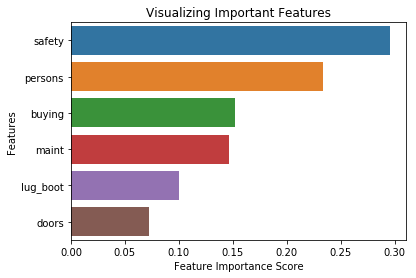

In [25]:
# 创建一个 seaborn 条形图
sns.barplot(x=feature_scores, y=feature_scores.index)

# 在图表上添加标签
plt.xlabel('特征重要性得分')
plt.ylabel('特征')

# 添加图表标题
plt.title("重要特征可视化")

# 显示图表
plt.show()

# **11. 在选定的特征上建立随机森林模型** <a class="anchor" id="17"></a>

现在，我将从模型中删除最不重要的特征“doors”，重建模型并检查其对准确性的影响。

In [26]:
# 声明特征向量和目标变量
X = df.drop(['class', 'doors'], axis=1)
y = df['class']  

In [27]:
# 将数据分割为训练集和测试集
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)  

现在，我将建立随机森林模型并检查准确性。

In [28]:
# 使用序数编码对分类变量进行编码
encoder = ce.OrdinalEncoder(cols=['buying', 'maint', 'persons', 'lug_boot', 'safety'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [29]:
# 使用 n_estimators = 100 实例化分类器
clf = RandomForestClassifier(random_state=0)

# 将模型拟合到训练集
clf.fit(X_train, y_train)

# 对测试集进行预测
y_pred = clf.predict(X_test)

# 检查精准度
print('Model accuracy score with doors variable removed : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with doors variable removed : 0.9264


我已经从模型中移除了 `doors` 变量，重新构建了模型并检查了其准确度。移除 `doors` 变量后的模型准确度为0.9264。考虑所有变量的模型准确度为0.9247。因此，我们可以看到移除 `doors` 变量后模型的准确度有所提高。

此外，第二不重要的变量是 `lug_boot`。如果我将其从模型中移除并重建模型，那么准确度被发现降至0.8546。这是准确度的显著下降。因此，我不会从模型中去除它。

根据上述分析，我们可以得出结论，我们的分类模型准确度非常好。我们的模型在预测类标签方面做得非常出色。

但是，它并没有提供值的基本分布。同时，它也没有说明我们的分类器所犯的错误类型。

我们还有另一个叫做`混淆矩阵`的工具可以帮助我们解决这个问题。

# **12. 混淆矩阵** <a class="anchor" id="18"></a>

混淆矩阵是一个用于总结分类算法性能的工具。混淆矩阵能为我们提供分类模型性能的清晰图像，以及模型产生的错误类型。它为我们提供了按每个类别划分的正确和错误预测的总结。这个总结以表格形式呈现。

在评估分类模型性能时，有四种可能的结果。这四种结果如下所述：

**真正例 (TP, True Positives)** —— 当我们预测一个观察值属于某个类别，并且该观察值确实属于那个类别时，就发生了真正例。

**真负例 (TN, True Negatives)** —— 当我们预测一个观察值不属于某个类别，并且该观察值确实不属于那个类别时，就发生了真负例。

**假正例 (FP, False Positives)** —— 当我们预测一个观察值属于某个类别，但该观察值实际上并不属于那个类别时，就发生了假正例。这种类型的错误称为 **第一类错误（Type I error）**。

**假负例 (FN, False Negatives)** —— 当我们预测一个观察值不属于某个类别，但该观察值实际上属于那个类别时，就发生了假负例。这是一种非常严重的错误，称为 **第二类错误（Type II error）**。

In [30]:
# 打印混乱矩阵并将其切成四块
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

Confusion matrix

 [[107   8   7   7]
 [  0  17   1   2]
 [ 10   0 387   0]
 [  3   4   0  18]]


# **13. 分类报告** <a class="anchor" id="19"></a>

**分类报告**是评估分类模型性能的另一种方式。它显示了模型的**精确度**、**召回率**、**F1 值**和**支持度**分数。我稍后会解释这些术语。

我们可以按如下方式打印分类报告：

In [31]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.89      0.83      0.86       129
        good       0.59      0.85      0.69        20
       unacc       0.98      0.97      0.98       397
       vgood       0.67      0.72      0.69        25

    accuracy                           0.93       571
   macro avg       0.78      0.84      0.81       571
weighted avg       0.93      0.93      0.93       571



# **14. 结果和结论** <a class="anchor" id="20"></a>

1. 在这个项目中，我构建了一个随机森林分类器来预测汽车的安全性。我构建了两个模型，一个使用10棵决策树，另一个使用100棵决策树。
2. 使用10棵决策树的模型准确度为0.9247，而使用100棵决策树的模型准确度为0.9457。因此，正如预期的那样，模型中决策树的数量增加，准确度也提高。
3. 我使用随机森林模型仅找出重要特征，使用这些特征构建模型，并查看其对准确度的影响。最重要的特征是`safety`，最不重要的特征是`doors`。
4. 我从模型中移除了`doors`变量，重新构建了模型并检查了其准确度。移除`doors`变量的模型准确度为0.9264。考虑所有变量的模型准确度为0.9247。因此，我们可以看到移除`doors`变量后模型的准确度有所提高。
5. 第二不重要的特征是`lug_boot`。如果我将它从模型中移除并重建模型，那么准确度降至0.8546。这是准确度的显著下降。因此，我不会将其从模型中去除。
6. 混淆矩阵和分类报告是另一种可视化模型性能的工具。它们展现了良好的性能。